
# Kickstarter Data Analysis
###### Athly Sabish     ---     17 October, 2019

*** TO DO ***
Description of the data

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date as date

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

%matplotlib inline

c:\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load and Clean Data

Read the .csv file containing data on over 300,000 Kickstarter projects. Display a sample.

In [3]:
raw_data = pd.read_csv("./kickstarter-projects/ks-projects-2018.csv")

In [4]:
raw_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Analyze the datatypes of each the variables in the file and determine if the datatype needs to be modified.

In [4]:
raw_data.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [5]:
pd.value_counts(raw_data["category"].values)

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Printing               238
Makerspaces            238
M

In [6]:
pd.value_counts(raw_data["main_category"].values)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
dtype: int64

In [7]:
pd.value_counts(raw_data["currency"].values)

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
dtype: int64

In [8]:
pd.value_counts(raw_data["state"].values)

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
dtype: int64

In [9]:
pd.value_counts(raw_data["country"].values)

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
dtype: int64

In [10]:
pd.value_counts(raw_data["ID"].values)

1294469119    1
925977744     1
959180384     1
1003356565    1
926393412     1
809374103     1
1116627353    1
1710038766    1
1138639261    1
1360941471    1
562018722     1
425689509     1
541927920     1
577401272     1
1813483943    1
2106587562    1
57143723      1
1942471085    1
1319623086    1
1088934319    1
217524656     1
1989091761    1
675160465     1
1233047951    1
1453775246    1
450806157     1
839113112     1
62458228      1
2027487605    1
789125494     1
             ..
941767661     1
77713075      1
317903856     1
1457189876    1
184738806     1
1820519415    1
33260506      1
25828679      1
1321948096    1
488525947     1
572169672     1
975391923     1
2125206928    1
65938870      1
1704688581    1
1051943878    1
1520135111    1
1406866376    1
947136390     1
1520108490    1
694887374     1
1637810574    1
364630992     1
1032575953    1
1119601618    1
87353557      1
579800545     1
1185151957    1
1230758870    1
1375737859    1
Length: 378661, dtype: i

Convert "main_category", "currency", "state", and "country" to categorical variables.

In [11]:
raw_data["main_category"].astype("category").head()

0      Publishing
1    Film & Video
2    Film & Video
3           Music
4    Film & Video
Name: main_category, dtype: category
Categories (15, object): [Art, Comics, Crafts, Dance, ..., Photography, Publishing, Technology, Theater]

In [12]:
raw_data["currency"].astype("category").head()

0    GBP
1    USD
2    USD
3    USD
4    USD
Name: currency, dtype: category
Categories (14, object): [AUD, CAD, CHF, DKK, ..., NZD, SEK, SGD, USD]

In [13]:
raw_data["state"].astype("category").head()

0      failed
1      failed
2      failed
3      failed
4    canceled
Name: state, dtype: category
Categories (6, object): [canceled, failed, live, successful, suspended, undefined]

In [14]:
raw_data["country"].astype("category").head()

0    GB
1    US
2    US
3    US
4    US
Name: country, dtype: category
Categories (23, object): [AT, AU, BE, CA, ..., NZ, SE, SG, US]

Convert the dates in the "deadline" and "launched" variables to datetime datatypes.

In [15]:
type(raw_data["deadline"][0])

str

In [16]:
raw_data.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [17]:
raw_data["deadline"].head()

0    2015-10-09
1    2017-11-01
2    2013-02-26
3    2012-04-16
4    2015-08-29
Name: deadline, dtype: object

In [18]:
date_format ="%Y-%m-%d"
dt.datetime.strptime(raw_data["deadline"][0], date_format)

datetime.datetime(2015, 10, 9, 0, 0)

In [19]:
converted_deadlines = raw_data["deadline"].map(lambda s: dt.datetime.strptime(s, date_format))
converted_deadlines.head()

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
4   2015-08-29
Name: deadline, dtype: datetime64[ns]

In [20]:
raw_data["launched"].head()

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object

In [21]:
date_format ="%Y-%m-%d %H:%M:%S"
dt.datetime.strptime(raw_data["launched"][0], date_format)

datetime.datetime(2015, 8, 11, 12, 12, 28)

In [22]:
converted_launches = raw_data["launched"].map(lambda s: dt.datetime.strptime(s, date_format))
converted_launches.head()

0   2015-08-11 12:12:28
1   2017-09-02 04:43:57
2   2013-01-12 00:20:50
3   2012-03-17 03:24:11
4   2015-07-04 08:35:03
Name: launched, dtype: datetime64[ns]

We just want to view successful and failed projects. Canceled, suspended, and live projects are going to be ignored in our analysis.

In [23]:
dataDF = raw_data[raw_data["state"].isin(["successful", "failed"])]
dataDF.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


## Analyze the data and variable relationships
Use the data available to determine which variables have correlate to the success of a project.

Separate the live and suspended projects from the rest. Also create a dataframe of successful projects so they can be used later.

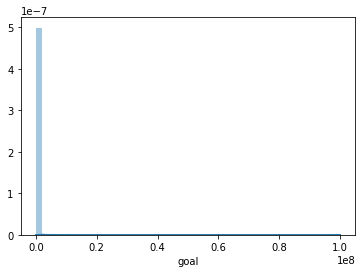

In [37]:
sns.distplot(dataDF["goal"])

In [24]:
successful_projects = dataDF[dataDF["state"] == "successful"]
live_projects = dataDF[dataDF["state"].isin(["live", "suspended"])]

In [25]:
live_projects.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


In [26]:
successful_projects.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,successful,761,GB,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.0,successful,7,US,250.00,250.00,250.00


In [27]:
main_category_successDF = pd.DataFrame(columns = ["main_category", "num_successful", "num_failed"])

In [28]:
main_category_successDF.head()

,main_category,num_successful,num_failed


In [29]:
main_category_successDF["main_category"] = dataDF["main_category"]

In [30]:
main_category_successDF.drop_duplicates(subset="main_category",keep="first",inplace=True)

for category in main_category_successDF:
    main_category_successDF["num_successful"] = 0
    main_category_successDF["num_failed"] = 0
    

main_category_successDF.head()

,main_category,num_successful,num_failed
0,Publishing,0,0
1,Film & Video,0,0
3,Music,0,0
5,Food,0,0
12,Crafts,0,0


In [31]:
pd.value_counts(main_category_successDF["main_category"])

Crafts          1
Design          1
Art             1
Games           1
Comics          1
Film & Video    1
Theater         1
Fashion         1
Music           1
Photography     1
Publishing      1
Dance           1
Technology      1
Journalism      1
Food            1
Name: main_category, dtype: int64

aggregate operation - select category 
1. keep records for successful projects
2. value counts for each category in that dataframe

Alternative
1. Percentage of successful in each category compared to the whole dataset
    -grouped = df[["main_category", "state"]].groupby(["main_category"])
    count(success/(success+failure))
2. Aggregate 
    -result = group.aggregate(function)
    -write function
        def function(entries):
            success = 0;
            for entry in 

In [32]:
def count_success(entries):
    #print(entries)
    successful = 0
    for entry in entries:
        if entry == "successful":
            successful = successful+1
            
    return successful/len(entries)

In [33]:
grouped = dataDF[["main_category", "state"]].groupby(["main_category"], as_index=False, sort=False)
grouped = grouped.aggregate(count_success)
grouped = grouped.rename(columns={"state" : "percent_successful"})
grouped

,main_category,percent_successful
0,Publishing,0.347017
1,Film & Video,0.417906
2,Music,0.526606
3,Food,0.275914
4,Crafts,0.270530
5,Games,0.438905
6,Design,0.415944
7,Comics,0.591415
8,Fashion,0.282832
9,Theater,0.637961


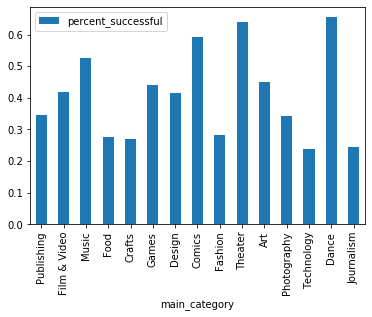

In [34]:
grouped.plot.bar(x="main_category", y="percent_successful")

In [35]:
grouped_country = dataDF[["state","country"]].groupby(["country"], as_index=False, sort=False)
grouped_country = grouped_country.aggregate(count_success)
grouped_country = grouped_country.rename(columns={"state" : "percent_successful"})

grouped_country

,country,percent_successful
0,GB,0.409690
1,US,0.418193
2,CA,0.334196
3,AU,0.303809
4,NO,0.278351
5,IT,0.185310
6,DE,0.272701
7,IE,0.303075
8,MX,0.280652
9,ES,0.262680


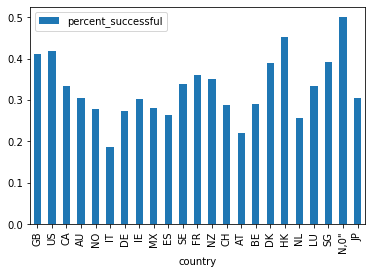

In [36]:
grouped_country.plot.bar(x="country", y="percent_successful")